# Analysis on LLY event

Analysis of the sentiment data on the Eli Lilly free insulin event on 11 November 2022 scored by BERT. 

Written by Luc Bijl.

We define the date of the event.

In [12]:
import pandas as pd

date_of_event = pd.to_datetime('2022-11-10 18:36')

## Analysis of the topic: Lilly

Loading the Lilly topics dataset.

In [13]:
import pickle

with open('../datasets/bert-scored/lilly.pkl','rb') as file:
    df_lilly = pickle.load(file)

len(df_lilly)

104

Firstly computing the number of toots over the dates distribution.

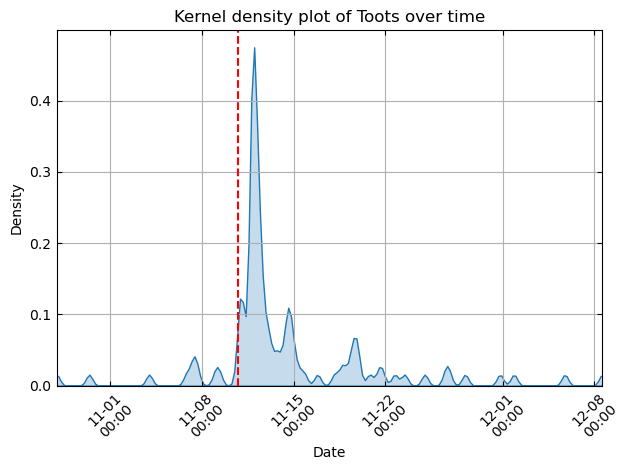

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

sns.kdeplot(data=df_lilly.index, shade=True, bw_adjust=0.1)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.xlim(df_lilly.index.min(), df_lilly.index.max())

plt.xlabel('Date')
plt.title('Kernel density plot of Toots over time')

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.axvline(date_of_event, color='red', linestyle='--')
plt.grid(True)

plt.tight_layout()
plt.show()

Secondly computing the summary statistics.

In [15]:
df_lilly_summary = pd.DataFrame({'min': df_lilly[['BERT sentiment score']].min(numeric_only=True),
                                 'mean': df_lilly[['BERT sentiment score']].mean(numeric_only=True),
                                 'median': df_lilly[['BERT sentiment score']].median(numeric_only=True),
                                 'max': df_lilly[['BERT sentiment score']].max(numeric_only=True)
                                }).T

df_lilly_summary

,BERT sentiment score
min,-0.701116
mean,-0.034357
median,-0.059021
max,0.588035


Thirdly computing the distribution of the scores given by BERT.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


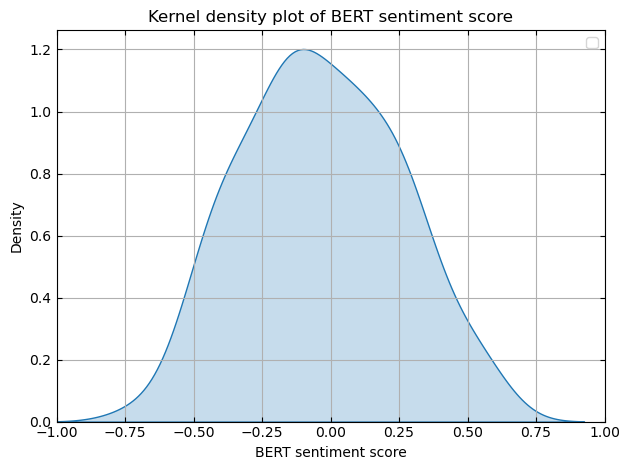

In [16]:
sns.kdeplot(data=df_lilly[['BERT sentiment score']], shade=True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.xlim(-1,1)
plt.title('Kernel density plot of BERT sentiment score')
plt.xlabel('BERT sentiment score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Lastly, the sentiment scores will be plotted against the date and the filtered mean will be computed and plotted in the same graph.

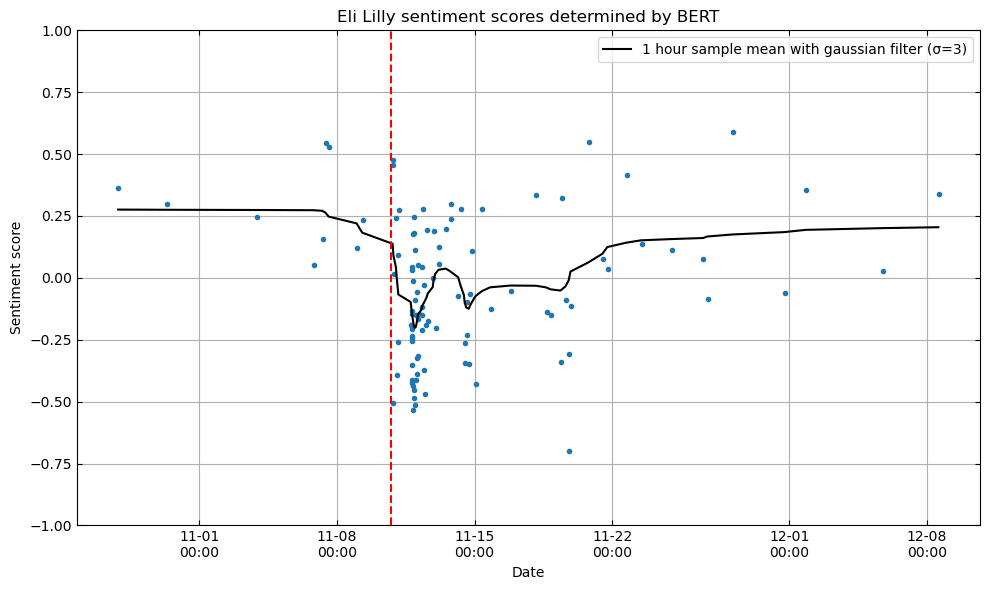

In [17]:
from scipy.ndimage import gaussian_filter1d

df_lilly_resampled = df_lilly[['BERT sentiment score']].resample('1H').mean().dropna()

sigma = 3
smoothed_scores = gaussian_filter1d(df_lilly_resampled['BERT sentiment score'], sigma=sigma)

plt.figure(figsize=(10,6))
plt.plot(df_lilly.index, df_lilly['BERT sentiment score'], marker='.', linestyle=' ')
plt.plot(df_lilly_resampled.index, smoothed_scores, color='black', label=f'1 hour sample mean with gaussian filter (σ={sigma})')
plt.ylim(-1,1)

plt.title('Eli Lilly sentiment scores determined by BERT')
plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.grid(True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.axvline(date_of_event, color='red', linestyle='--')
plt.legend()

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()

Zooming in on the event with a period of 2 days before the event and 7 days after the event.

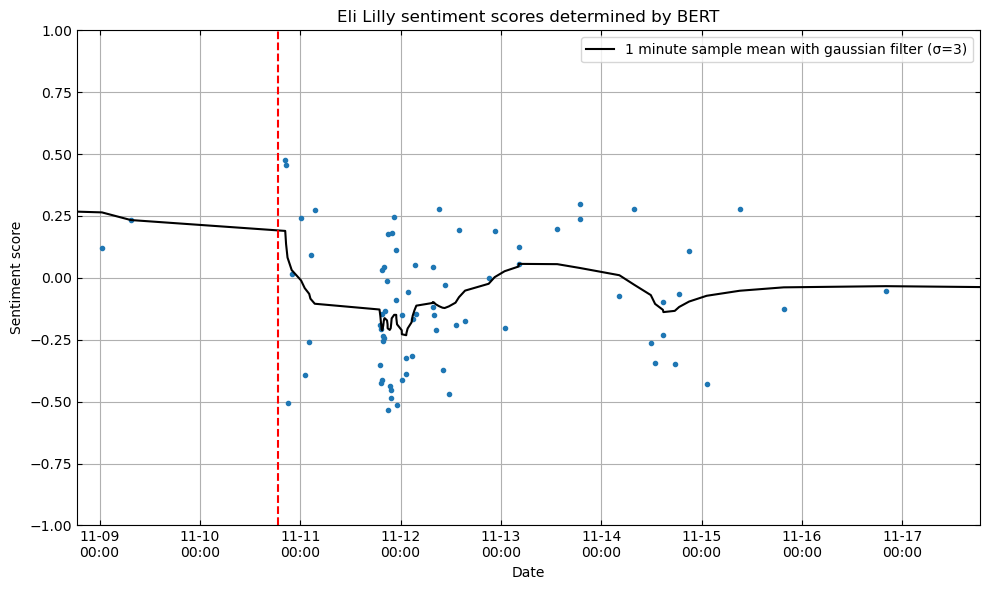

In [18]:
df_lilly_resampled = df_lilly[['BERT sentiment score']].resample('60S').mean().dropna()

sigma = 3
smoothed_scores = gaussian_filter1d(df_lilly_resampled['BERT sentiment score'], sigma=sigma)

date_start = date_of_event - pd.Timedelta(days=2)
date_end =  date_of_event + pd.Timedelta(days=7)

plt.figure(figsize=(10,6))
plt.plot(df_lilly.index, df_lilly['BERT sentiment score'], marker='.', linestyle=' ')
plt.plot(df_lilly_resampled.index, smoothed_scores, color='black', label=f'1 minute sample mean with gaussian filter (σ={sigma})')

plt.ylim(-1,1)

plt.title('Eli Lilly sentiment scores determined by BERT')
plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.grid(True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.xlim(date_start,date_end)
plt.axvline(date_of_event, color='red', linestyle='--')
plt.legend()

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()

## Analysis of the topic: Insulin

Loading the Insulin topics dataset.

In [19]:
import pickle

with open('../datasets/bert-scored/insulin.pkl','rb') as file:
    df_insulin = pickle.load(file)

len(df_insulin)

150

Firstly computing the number of toots over the dates distribution.

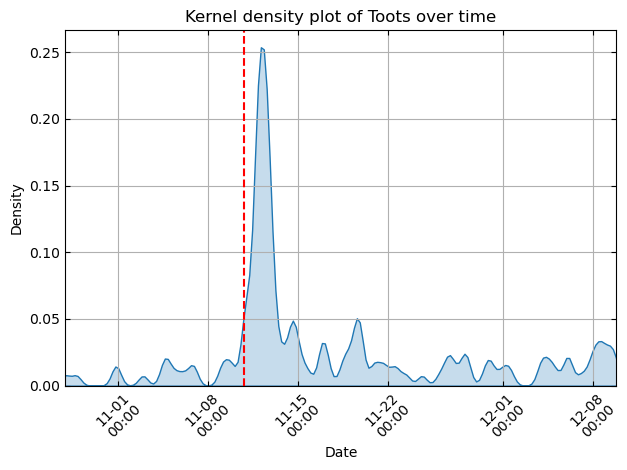

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

sns.kdeplot(data=df_insulin.index, shade=True, bw_adjust=0.1)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.xlim(df_insulin.index.min(),df_insulin.index.max())

plt.xlabel('Date')
plt.title('Kernel density plot of Toots over time')

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.axvline(date_of_event, color='red', linestyle='--')
plt.grid(True)

plt.tight_layout()
plt.show()

Secondly computing the summary statistics.

In [21]:
df_insulin_summary = pd.DataFrame({'min': df_insulin[['BERT sentiment score']].min(numeric_only=True),
                                 'mean': df_insulin[['BERT sentiment score']].mean(numeric_only=True),
                                 'median': df_insulin[['BERT sentiment score']].median(numeric_only=True),
                                 'max': df_insulin[['BERT sentiment score']].max(numeric_only=True)
                                }).T

df_insulin_summary

,BERT sentiment score
min,-0.701116
mean,-0.053602
median,-0.085887
max,0.599067


Thirdly computing the distribution of the scores given by BERT.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


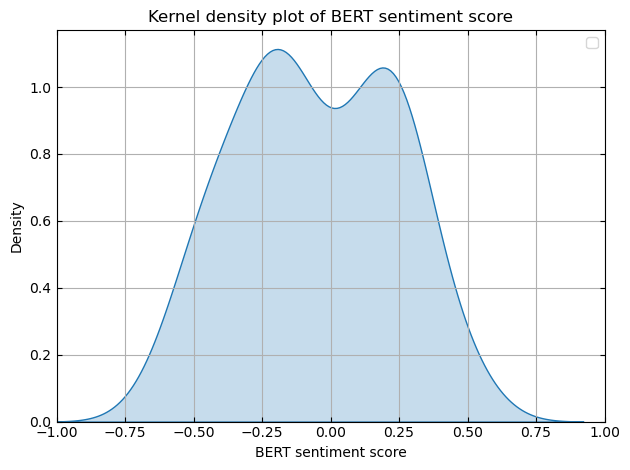

In [22]:
sns.kdeplot(data=df_insulin[['BERT sentiment score']], shade=True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.xlim(-1,1)
plt.title('Kernel density plot of BERT sentiment score')
plt.xlabel('BERT sentiment score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Lastly, the sentiment scores will be plotted against the date and the filtered mean will be computed and plotted in the same graph.

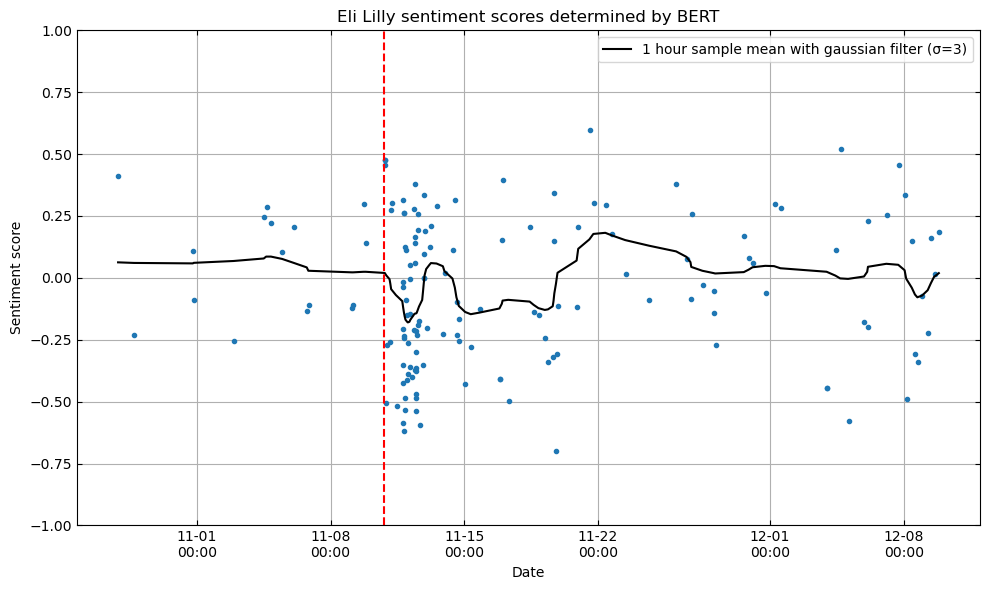

In [23]:
from scipy.ndimage import gaussian_filter1d

df_insulin_resampled = df_insulin[['BERT sentiment score']].resample('1H').mean().dropna()

sigma = 3
smoothed_scores = gaussian_filter1d(df_insulin_resampled['BERT sentiment score'], sigma=sigma)

plt.figure(figsize=(10,6))
plt.plot(df_insulin.index, df_insulin['BERT sentiment score'], marker='.', linestyle=' ')
plt.plot(df_insulin_resampled.index, smoothed_scores, color='black', label=f'1 hour sample mean with gaussian filter (σ={sigma})')
plt.ylim(-1,1)

plt.title('Eli Lilly sentiment scores determined by BERT')
plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.grid(True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.axvline(date_of_event, color='red', linestyle='--')
plt.legend()

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()

## Analysis of the topic: Diabetes

Loading the Diabetes topics dataset.

In [24]:
import pickle

with open('../datasets/bert-scored/diabetes.pkl','rb') as file:
    df_diabetes = pickle.load(file)

len(df_diabetes)

165

Firstly computing the number of toots over the dates distribution.

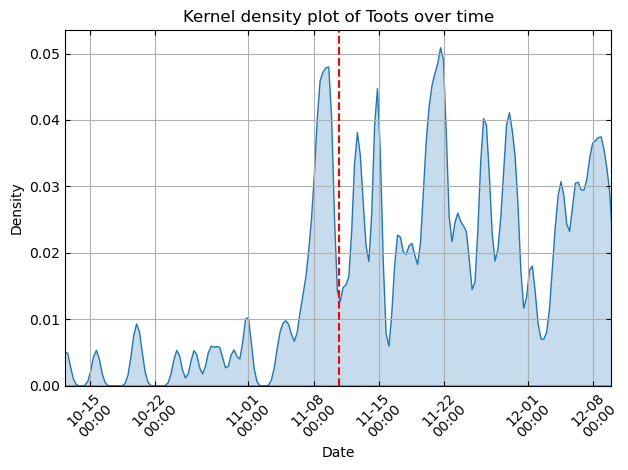

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

sns.kdeplot(data=df_diabetes.index, shade=True, bw_adjust=0.1)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.xlim(df_diabetes.index.min(),df_diabetes.index.max())

plt.xlabel('Date')
plt.title('Kernel density plot of Toots over time')

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.axvline(date_of_event, color='red', linestyle='--')
plt.grid(True)

plt.tight_layout()
plt.show()

Secondly computing the summary statistics.

In [26]:
df_diabetes_summary = pd.DataFrame({'min': df_diabetes[['BERT sentiment score']].min(numeric_only=True),
                                 'mean': df_diabetes[['BERT sentiment score']].mean(numeric_only=True),
                                 'median': df_diabetes[['BERT sentiment score']].median(numeric_only=True),
                                 'max': df_diabetes[['BERT sentiment score']].max(numeric_only=True)
                                }).T

df_diabetes_summary

,BERT sentiment score
min,-0.701116
mean,0.081326
median,0.129802
max,0.743641


Thirdly computing the distribution of the scores given by BERT.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


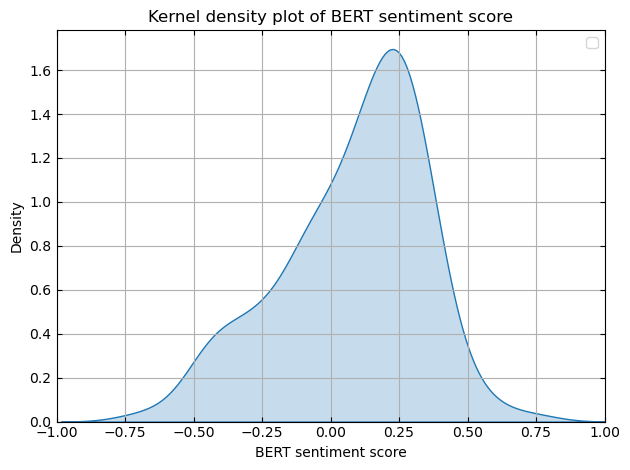

In [27]:
sns.kdeplot(data=df_diabetes[['BERT sentiment score']], shade=True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.xlim(-1,1)
plt.title('Kernel density plot of BERT sentiment score')
plt.xlabel('BERT sentiment score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Lastly, the sentiment scores will be plotted against the date and the filtered mean will be computed and plotted in the same graph.

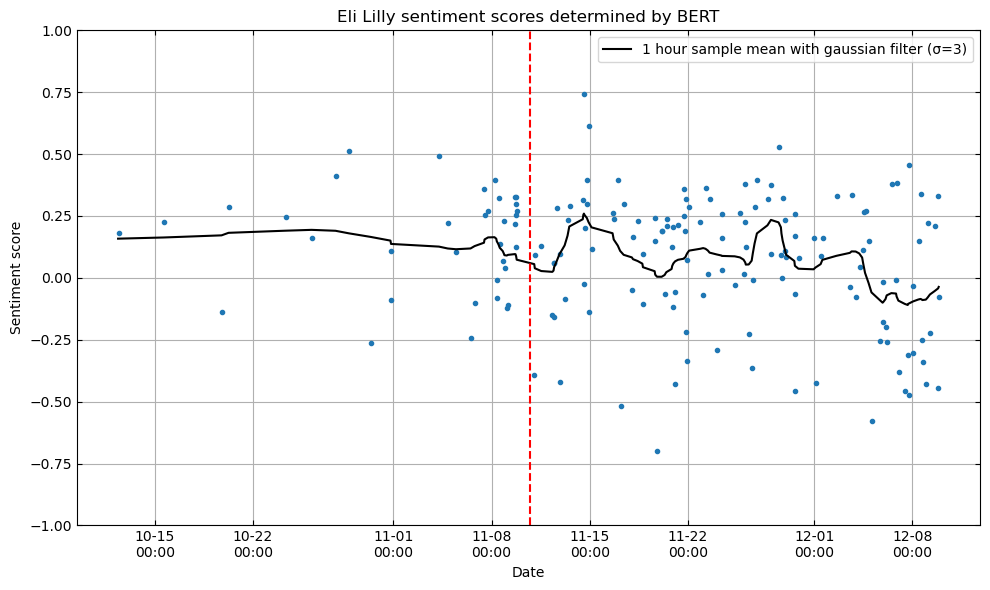

In [28]:
from scipy.ndimage import gaussian_filter1d

df_diabetes_resampled = df_diabetes[['BERT sentiment score']].resample('1H').mean().dropna()

sigma = 3
smoothed_scores = gaussian_filter1d(df_diabetes_resampled['BERT sentiment score'], sigma=sigma)

plt.figure(figsize=(10,6))
plt.plot(df_diabetes.index, df_diabetes['BERT sentiment score'], marker='.', linestyle=' ')
plt.plot(df_diabetes_resampled.index, smoothed_scores, color='black', label=f'1 hour sample mean with gaussian filter (σ={sigma})')
plt.ylim(-1,1)

plt.title('Eli Lilly sentiment scores determined by BERT')
plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.grid(True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.axvline(date_of_event, color='red', linestyle='--')
plt.legend()

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()

## Analysis of the topic: Pharmaceutic

Loading the Pharmaceutic topics dataset.

In [29]:
import pickle

with open('../datasets/bert-scored/pharmaceutic.pkl','rb') as file:
    df_pharmaceutic = pickle.load(file)

len(df_pharmaceutic)

42

Firstly computing the number of toots over the dates distribution.

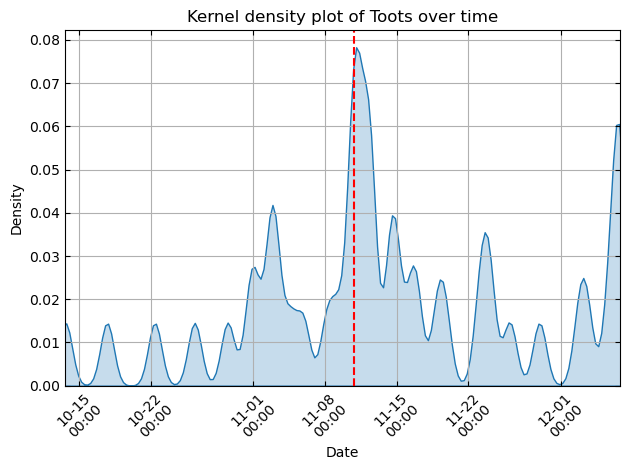

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

sns.kdeplot(data=df_pharmaceutic.index, shade=True, bw_adjust=0.1)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.xlim(df_pharmaceutic.index.min(),df_pharmaceutic.index.max())

plt.xlabel('Date')
plt.title('Kernel density plot of Toots over time')

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.axvline(date_of_event, color='red', linestyle='--')
plt.grid(True)

plt.tight_layout()
plt.show()

Secondly computing the summary statistics.

In [31]:
df_pharmaceutic_summary = pd.DataFrame({'min': df_pharmaceutic[['BERT sentiment score']].min(numeric_only=True),
                                 'mean': df_pharmaceutic[['BERT sentiment score']].mean(numeric_only=True),
                                 'median': df_pharmaceutic[['BERT sentiment score']].median(numeric_only=True),
                                 'max': df_pharmaceutic[['BERT sentiment score']].max(numeric_only=True)
                                }).T

df_pharmaceutic_summary

,BERT sentiment score
min,-0.546251
mean,0.009646
median,0.004768
max,0.661465


Thirdly computing the distribution of the scores given by BERT.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


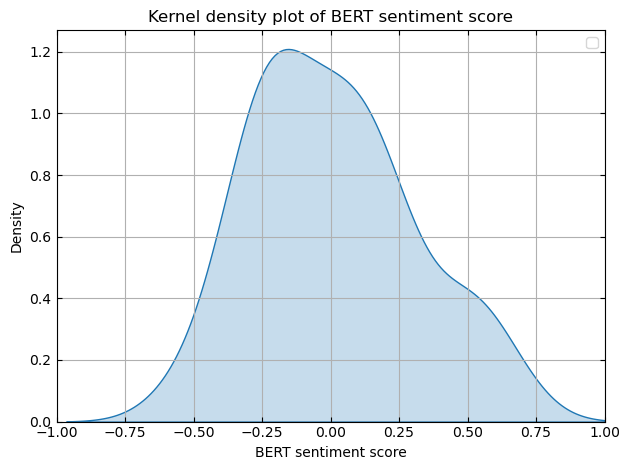

In [32]:
sns.kdeplot(data=df_pharmaceutic[['BERT sentiment score']], shade=True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.xlim(-1,1)
plt.title('Kernel density plot of BERT sentiment score')
plt.xlabel('BERT sentiment score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Lastly, the sentiment scores will be plotted against the date and the filtered mean will be computed and plotted in the same graph.

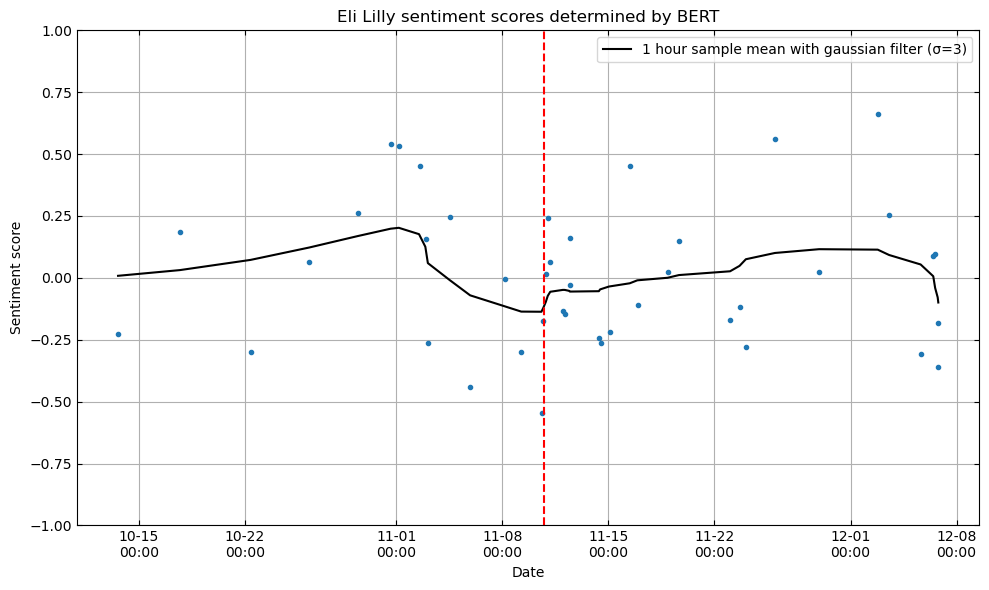

In [33]:
from scipy.ndimage import gaussian_filter1d

df_pharmaceutic_resampled = df_pharmaceutic[['BERT sentiment score']].resample('1H').mean().dropna()

sigma = 3
smoothed_scores = gaussian_filter1d(df_pharmaceutic_resampled['BERT sentiment score'], sigma=sigma)

plt.figure(figsize=(10,6))
plt.plot(df_pharmaceutic.index, df_pharmaceutic['BERT sentiment score'], marker='.', linestyle=' ')
plt.plot(df_pharmaceutic_resampled.index, smoothed_scores, color='black', label=f'1 hour sample mean with gaussian filter (σ={sigma})')
plt.ylim(-1,1)

plt.title('Eli Lilly sentiment scores determined by BERT')
plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.grid(True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.axvline(date_of_event, color='red', linestyle='--')
plt.legend()

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()

## Analysis of the topic: Medicine

Loading the Medicine topics dataset.

In [34]:
import pickle

with open('../datasets/bert-scored/medical.pkl','rb') as file:
    df_medical = pickle.load(file)

len(df_medical)

1189

Firstly computing the number of toots over the dates distribution.

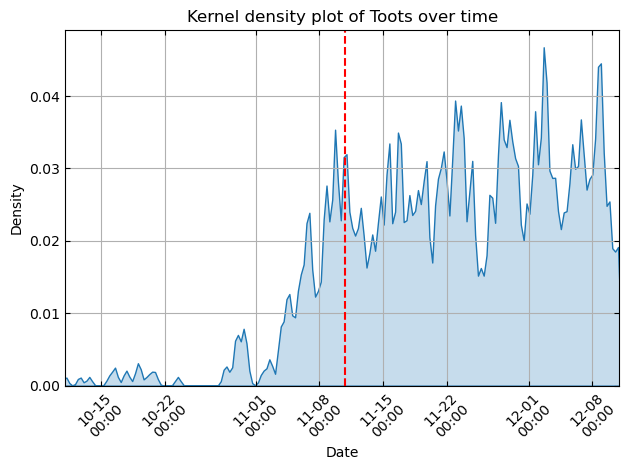

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

sns.kdeplot(data=df_medical.index, shade=True, bw_adjust=0.1)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.xlim(df_medical.index.min(),df_medical.index.max())

plt.xlabel('Date')
plt.title('Kernel density plot of Toots over time')

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.axvline(date_of_event, color='red', linestyle='--')
plt.grid(True)

plt.tight_layout()
plt.show()

Secondly computing the summary statistics.

In [36]:
df_medical_summary = pd.DataFrame({'min': df_medical[['BERT sentiment score']].min(numeric_only=True),
                                 'mean': df_medical[['BERT sentiment score']].mean(numeric_only=True),
                                 'median': df_medical[['BERT sentiment score']].median(numeric_only=True),
                                 'max': df_medical[['BERT sentiment score']].max(numeric_only=True)
                                }).T

df_medical_summary

,BERT sentiment score
min,-0.750644
mean,0.001827
median,-0.004025
max,0.798334


Thirdly computing the distribution of the scores given by BERT.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


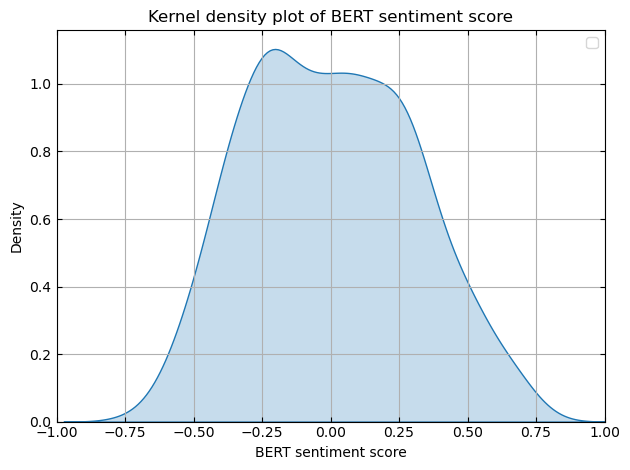

In [37]:
sns.kdeplot(data=df_medical[['BERT sentiment score']], shade=True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.xlim(-1,1)
plt.title('Kernel density plot of BERT sentiment score')
plt.xlabel('BERT sentiment score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Lastly, the sentiment scores will be plotted against the date and the filtered mean will be computed and plotted in the same graph.

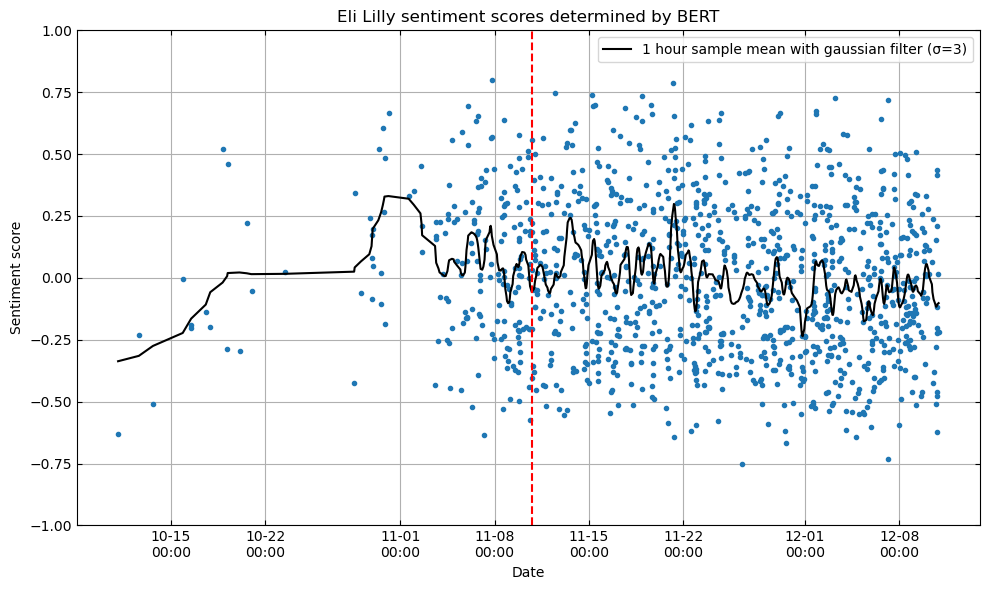

In [38]:
from scipy.ndimage import gaussian_filter1d

df_medical_resampled = df_medical[['BERT sentiment score']].resample('1H').mean().dropna()

sigma = 3
smoothed_scores = gaussian_filter1d(df_medical_resampled['BERT sentiment score'], sigma=sigma)

plt.figure(figsize=(10,6))
plt.plot(df_medical.index, df_medical['BERT sentiment score'], marker='.', linestyle=' ')
plt.plot(df_medical_resampled.index, smoothed_scores, c, label=f'1 hour sample mean with gaussian filter (σ={sigma})')
plt.ylim(-1,1)

plt.title('Eli Lilly sentiment scores determined by BERT')
plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.grid(True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.axvline(date_of_event, color='red', linestyle='--')
plt.legend()

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()

## Creating visualisations that encompass all analyses

Plotting all filtered sample means.

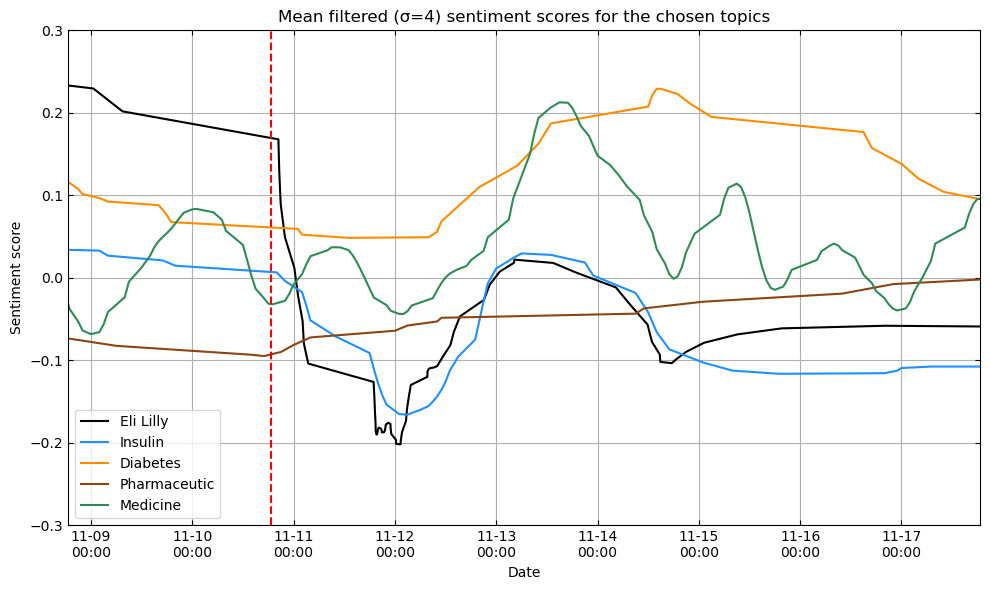

In [77]:
from scipy.ndimage import gaussian_filter1d

sigma = 4

smoothed_scores = {'Lilly': gaussian_filter1d(df_lilly_resampled['BERT sentiment score'], sigma=sigma),
                   'Insulin': gaussian_filter1d(df_insulin_resampled['BERT sentiment score'], sigma=sigma),
                   'Diabetes': gaussian_filter1d(df_diabetes_resampled['BERT sentiment score'], sigma=sigma),
                   'Pharmaceutic': gaussian_filter1d(df_pharmaceutic_resampled['BERT sentiment score'], sigma=sigma),
                   'Medical': gaussian_filter1d(df_medical_resampled['BERT sentiment score'], sigma=sigma)
                   }

plt.figure(figsize=(10,6))
plt.plot(df_lilly_resampled.index, smoothed_scores['Lilly'], label='Eli Lilly', color='black')
plt.plot(df_insulin_resampled.index, smoothed_scores['Insulin'], label='Insulin', color='dodgerblue')
plt.plot(df_diabetes_resampled.index, smoothed_scores['Diabetes'], label='Diabetes', color='darkorange')
plt.plot(df_pharmaceutic_resampled.index, smoothed_scores['Pharmaceutic'], label='Pharmaceutic', color='saddlebrown')
plt.plot(df_medical_resampled.index, smoothed_scores['Medical'], label='Medicine', color='seagreen')

plt.ylim(-0.3, 0.3)
plt.xlim(date_start,date_end)

plt.title(f'Mean filtered (σ={sigma}) sentiment scores for the chosen topics')
plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.grid(True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.axvline(date_of_event, color='red', linestyle='--')
plt.legend()

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()